UML 클래스 에서의 가시성표현
   
+: public  
-: private  
\#: protected  

속성은 대부분 private
파이썬의 인터프리터: c언어  

# 객체지향 프로그래밍

# 클래스

$class\ 클래스이름(부모 클래스):$  
$\qquad 클래스 몸체$

#### - 클래스 객체
클래스를 인스턴스화(instantiation)하여 만들어진 객체(object)
클래스의 변수와 메소드에 접근 가능

In [1]:
class Test: #클래스정의
            name = "홍길동" #클래스속성
t = Test() #객체생성
print(t.name) 

홍길동


#### - 초기화 함수 (__init__())
or 생성함수 라고도함  
객체 생성시 자동실행 되는 메소드  
인스턴스 변수 초기화시 사용  
첫번째 매개변수: self (클래스 객체, 자기자신)  
인스턴스 변수는 클래스 내 모든 메소드에서 사용가능  


In [2]:
class Car :
     def __init__(self, color, speed):
         self.color = color 
         self.speed = speed 

In [ ]:
mycar = Car('Black', 60) # Car 클래스의 객체 생성
print('색상: ', mycar.color, '속도: ', mycar.speed) #속성 접근

mycar.color = 'Red' # 속성 변경
print('색상: ', mycar.color)

색상:  Black 속도:  60
색상:  Red


#### - 클래스 변수, 인스턴스(객체) 변수
- 클래스 변수(class variable):  
클래스 내에서 유효하며 모든 객체가 공유하는 변수  
  
- 인스턴스 변수(instance variable):  
특정 객체에만 속하는 변수

In [8]:
class Calc:
     count = 0 # 클래스 변수
     def add(self, a=0, b=0):
          self.a = a # 인스턴스 변수
          self.b = b
          self.count += 1 # 클래스 변수를 self와 함께 사용하면 인스턴스 변수처럼 사용
          return self.a + self.b
     def minus(self, a,b):
         if a == 0 or b== 0:
             return a - b, self.count
         else:
             return a-b
         
obj = Calc()
print(obj.minus(3,1)) #count 속성 출력
print(obj.add(1, 2)) #count 속성 증가
print(obj.count, Calc.count) 


2
3
1 0


In [1]:
dir(object)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

#### - 클래스 상속
클래스로부터 속성과 메소드 이어받고 자신이 필요한 기능을 추가하는 기법  

$class\ subclass(superclass)$  


In [ ]:
class People:
    def __init__(self, age=0, name=None):
        self.__age = age
        self.__name = name
    
    def introMe(self):
        print("Name :", self.__name, "age :", str(self.__age))
         
class Teacher(People) :
    def __init__(self, age=0, name=None, school=None) :
        super().__init__(age, name) # 상위 클래스의 속성 상속 (할당)
        self.school = school 
            
    def showSchool(self):
         print("My School is ", self.school)
       


In [12]:
p1 = People(29, "Lee")
p1.introMe() 

t1 = Teacher(48, "Kim", "HighSchool")
t1.introMe() # 상위클래스인 People의 메소드 상속

Name : Lee age : 29
Name : Kim age : 48


#### - 메소드 오버라이딩 (Method Overridng)
자식 클래스에서 부모 클래스의 메소드를 재정의 하는 것

In [16]:
class Student(People) : # 자식 클래스
    def __init__(self, age=0, name=None, grade=None):
        super().__init__(age, name)
        self.__grade = grade #자식 클래스의 새로운 변수
    def introMe(self): # 부모 클래스 메소드를 재정의
        super().introMe()
        print("Grade : ", self.__grade) # 점수를 추가로 출력

In [15]:
p1 = People(29, "Lee")
p1.introMe() 
s1 = Student(17, "Park", 2)
s1.introMe()

Name : Lee age : 29
Name : Park age : 17
Grade :  2



다형성 (Polymorphism) : 함수 이름은 같지만 내용물에따라 호출됨이 다름  
poly-: 많은  
morph: 형태  
(같아보이지만) 다양한 형태를 가진  
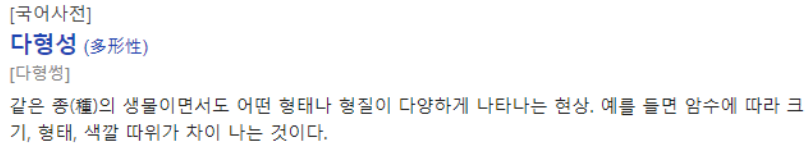

#### - 가시성 (Visibility)
public: 밑줄없음 (value)  
protected: 이름 앞에 밑줄 1개 (_value)  
private: 이름 앞에 밑줄 2개 (__value)


#### - 추상 함수 (abstract methods)
하위 클래스에서 반드시 구현해야 한다.  
객체화 할 수 없다.

In [ ]:
from abc import ABC, abstractmethod

class Animal(ABC):
  @abstractmethod
  def sound(self):
    pass

class Dog(Animal):
  def sound(self): # 재정의
    return "멍멍"
 # a = Animal() # 에러: 추상클래스는인스턴스화불가
d = Dog()
print(d.sound()) 

# a = Animal(Dog()) TypeError: Animal() takes no arguments
# a.sound()

멍멍


#### - 정적 멤버 (static memeber)  
클래스 전체에서 공유되는 변수  
클래스 변수, 클래스 메소드  
메소드는 @staticmethod 데코레이터를 사용하여 정적 메소드 정의


In [3]:
class Counter:
    count = 0 # 클래스 변수(정적 멤버)

    def __init__(self):
        self.__object_counter = 1 # public

    @staticmethod
    def increment_class():
        Counter.count += 1

    def increment_object(self):
        self.__object_counter += 1 # private

if __name__ == "__main__":
    Counter.increment_class()
    print(Counter.count) # 1

    c = Counter() # 인스턴스 생성
    # print(c.object_counter) # 1
    c.increment_object()
    # print(c.__object_counter) # private 접근 불가

1


#### - Dunder Methods  
Double Underlines  
__xxx__ 형태의 메소드: 자동으로 호출되는 경우 많다  
>> 재정의 하여 사용자 코드로 사용가능  
- __init__ (self,...): 생성함수, 객체 생성시 자동 실행  
- __str__ (self): 클래스 객체를 문자열로 형변환시 자동 실행  
- __eq__(self, other): 이 객체와 다른 객체가 같은지  
- __gt__(self, other): 이 객체가 다른 객체보다 큰지

In [1]:
class Student:
    def __init__(self, name, age):
        self.name =name
        self.age = age
    def __str__(self):
        return f"Student(name={self.name}, age={self.age})"
    def __eq__(self, other):
        if isinstance(other, Student):
         return self.name == other.name and self.age ==other.age
        return False
    def __del__(self):
        print(f"Student {self.name} is being deleted")
if __name__ =="__main__":

    student1 = Student("Alice", 20)
    student2 = Student("Bob", 22)
    student3 = Student("Alice", 20)

    print(student1) # Calls __str__
    print(student2) # Calls __str__
    print(student1 ==student2) # Calls __eq__
    print(student1 ==student3) # Calls __eq__
    del student1 # Calls __del__

Student(name=Alice, age=20)
Student(name=Bob, age=22)
False
True
Student Alice is being deleted


#### - 파이썬 데코레이터  
함수, 클래스의 동작을 수정하거나 확장  
@데코레이터이름  


In [2]:
def simple_decorator(func):
 def wrapper():
    print("함수실행전")
    result= func()
    print("함수실행후")
    return result
 return wrapper

@simple_decorator
def say_hello():
    print("Hello, World!")
if __name__=="__main__":
    print("=== 예제1: 기본데코레이터===")
    say_hello()

=== 예제1: 기본데코레이터===
함수실행전
Hello, World!
함수실행후
